## Neural Networks
In this notebook, we will walk through one main neural nets example. And that is, classifying the infamous MNIST dataset. **If you have no experience with neural nets prior to this notebook, I recommend doing a quick search for an "intro to neural nets"**, there are multiple tutorials/blog posts out there and you can choose the one that works for you.

Here, we will use the `Flux` package, but if you want to look at other packages I encourage you to look at `Knet.jl` and `TensorFlow.jl`.

In [1]:
using Flux
using MLDatasets, MLUtils
using Flux: onehotbatch, argmax, crossentropy, throttle
using Base.Iterators: repeated
using Images

Let's take a look at one of the images.

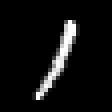

In [2]:
train_data = MNIST(split=:train)
img = train_data[100].features
colorview(Gray, img')

From targets, we will create a new output column for each image. These columns will be indicator vectors of where the correct label is.

The `onehotbatch` function allows us to create this easily.

In [3]:
x_train, y_train = train_data.features, train_data.targets

# Preprocess
x_train = flatten(x_train)
y_train = onehotbatch(y_train, 0:9)

loader = DataLoader((x_train, y_train), batchsize=128, shuffle=true)


469-element DataLoader(::Tuple{Matrix{Float32}, OneHotArrays.OneHotMatrix{UInt32, Vector{UInt32}}}, shuffle=true, batchsize=128)
  with first element:
  (784×128 Matrix{Float32}, 10×128 OneHotMatrix(::Vector{UInt32}) with eltype Bool,)

And now we will actually build our neural network. We will use two layers. The hidden layer will have 32 nodes, and the output layer will have 10 nodes. i.e. we will go from: `28*28 => 32 => 10`.

In [4]:
model = Chain(
  Dense(28^2, 32, relu),
  Dense(32, 10),
  softmax)

Chain(
  Dense(784 => 32, relu),               # 25_120 parameters
  Dense(32 => 10),                      # 330 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 25_450 parameters, 99.617 KiB.

What does `model`, the neural network mean here? 

If you've worked with neural networks before you know that the solution is often not found by just one pass on the neural network. One pass happens, and a solution is generated at the output layer, then this solution is compared to the ground truth solution we already have (the columns from `y_train`), and the network goes back and adjusts its weights and parameters and then try again.

To run our neural network, we need a loss function and an accuracy function. The accuracy function is used to compare the output result from the output layer in the neural network to the groundtruth result. The loss function is used to evaluate the performance of the overall model after new weights have been recalculated at each pass.

In [5]:
loss(model, x, y) = (loss = Flux.logitcrossentropy(model(x), y); @show loss; loss)
opt_state = Flux.setup(Flux.Adam(0.01), model);

We will create a function to display the loss at each step.

In [6]:
Flux.train!(loss, model, loader, opt_state)
println("Training complete.")

loss = 2.3003216f0
loss = 2.236171f0
loss = 2.193145f0
loss = 2.0871193f0
loss = 2.0816321f0
loss = 1.9156976f0
loss = 1.9012768f0
loss = 1.8663958f0
loss = 1.8437393f0
loss = 1.8504336f0
loss = 1.8618894f0
loss = 1.8176337f0
loss = 1.8297461f0
loss = 1.7056276f0
loss = 1.7136507f0
loss = 1.7228457f0
loss = 1.7086393f0
loss = 1.6583561f0
loss = 1.6814754f0
loss = 1.6937943f0
loss = 1.6113474f0
loss = 1.6363189f0
loss = 1.6596433f0
loss = 1.6165588f0
loss = 1.6674447f0
loss = 1.6304032f0
loss = 1.6848623f0
loss = 1.6961565f0
loss = 1.5729822f0
loss = 1.6249275f0
loss = 1.6003265f0
loss = 1.5836047f0
loss = 1.6300077f0
loss = 1.6477646f0
loss = 1.6264858f0
loss = 1.6021521f0
loss = 1.5799218f0
loss = 1.6091257f0
loss = 1.5742059f0
loss = 1.58317f0
loss = 1.6077583f0
loss = 1.6399919f0
loss = 1.5647383f0
loss = 1.5413212f0
loss = 1.6449699f0
loss = 1.5708293f0
loss = 1.5498139f0
loss = 1.6552484f0
loss = 1.6397945f0
loss = 1.595682f0
loss = 1.5740894f0
loss = 1.6215961f0
loss = 1.6140271f

We will now get the test data.

In [7]:
test_data = MNIST(split=:test)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

In [8]:
x_test = test_data.features
x_test = flatten(x_test)
test_image = model(x_test[:,1])
argmax(test_image) - 1

7

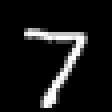

In [9]:
t1 = reshape(x_test[:,1],28,28)
colorview(Gray, t1')

What about the image we tried a few cells earlier and returned the "not-so-great" answer.

In [10]:
onefigure = x_train[:,2]
model(onefigure)

10-element Vector{Float32}:
 1.0
 2.1732135f-30
 1.0297358f-12
 6.8872825f-14
 1.4270435f-25
 7.2391484f-15
 1.1186819f-17
 5.1354913f-18
 1.2558939f-16
 5.4961194f-19

In [11]:
y_train[:,2]

10-element OneHotVector(::UInt32) with eltype Bool:
 1
 ⋅
 ⋅
 ⋅
 ⋅
 ⋅
 ⋅
 ⋅
 ⋅
 ⋅

# Finally...
After finishing this notebook, you should be able to:
- prepare data to fit the format for Flux.jl
- using a neural network with Flux.jl

